In [1]:
'''
Problem Statement 
'''

'\nProblem Statement \n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.datasets import load_iris
iris=load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df["Class"]=iris.target
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Class              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
# distribution of target
df["Class"].value_counts()
# Balanced distribution

Class
0    50
1    50
2    50
Name: count, dtype: int64

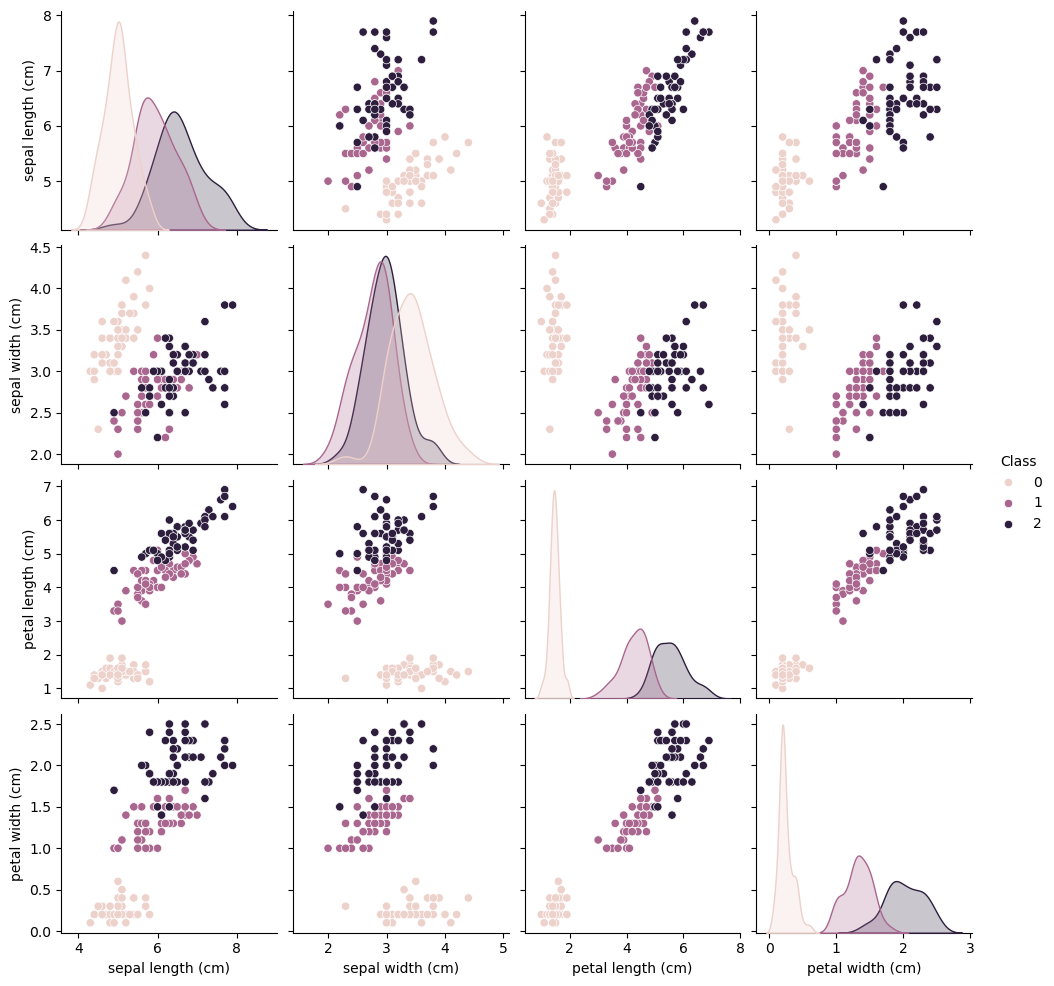

In [9]:
sns.pairplot(data=df,hue="Class")

In [10]:
# NUll check---
# boxplot for outlier check
# skewness removal check
# object encoding check

In [11]:
features=df.drop("Class",axis=1)
target=df["Class"]

In [12]:
# data scaling

In [13]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
    features, target, test_size=0.15, random_state=4)

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [15]:
def mymodel(model):
    model.fit(xtrain,ytrain) #
    ypred=model.predict(xtest)
    # checking for overfitting underfitting
    print(f"Training score : {model.score(xtrain,ytrain)}")
    print(f"Testing score : {model.score(xtest,ytest)}")
    c=pd.DataFrame(confusion_matrix(ytest,ypred),
              index=['setosa', 'versicolor', 'virginica'],
              columns=['setosa', 'versicolor', 'virginica'])
    print(f"Confusion Matrix : \n{c}")
    print("Classification Report : \n",classification_report(ytest,ypred))
    return model
    

In [16]:
dt=mymodel(DecisionTreeClassifier())

Training score : 1.0
Testing score : 0.9565217391304348
Confusion Matrix : 
            setosa  versicolor  virginica
setosa          10           0          0
versicolor       0           4          1
virginica        0           0          8
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.80      0.89         5
           2       0.89      1.00      0.94         8

    accuracy                           0.96        23
   macro avg       0.96      0.93      0.94        23
weighted avg       0.96      0.96      0.96        23



In [17]:
dt

DecisionTreeClassifier()

In [18]:
d={
    "Feature names":iris.feature_names,
    "Feature Importance": dt.feature_importances_
}
fi=pd.DataFrame(d)
fi

,Feature names,Feature Importance
0,sepal length (cm),0.015767
1,sepal width (cm),0.000000
2,petal length (cm),0.053143
3,petal width (cm),0.931090


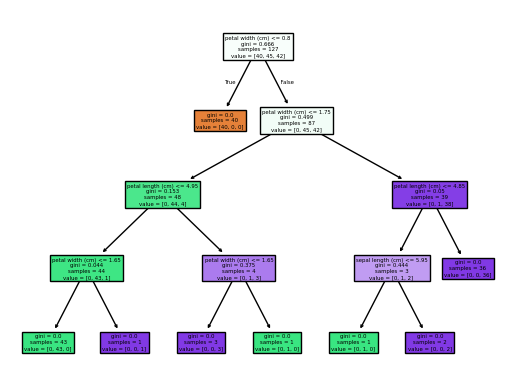

In [19]:
from sklearn import tree
tree.plot_tree(dt,feature_names=iris.feature_names,filled=True)
plt.show()

In [20]:
dt.get_depth()

4

In [21]:
dt.get_n_leaves()

np.int64(8)

In [22]:
# to deal with overfitting apply pruning techniques 
parameters={
    "max_depth":list(range(1,4)), # 1,2,3
    "min_samples_split":list(range(1,4)), # 1,2,3
    "min_samples_leaf":list(range(2,4)) # 2,3
}

In [23]:
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(DecisionTreeClassifier(),parameters,verbose=2)
clf.fit(xtrain,ytrain)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=1; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=1; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=1; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=1; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=1; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=1, min_samples_lea

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [1, 2, 3]},
             verbose=2)

In [24]:
c=mymodel(clf.best_estimator_)
c

Training score : 0.9763779527559056
Testing score : 0.9565217391304348
Confusion Matrix : 
            setosa  versicolor  virginica
setosa          10           0          0
versicolor       0           4          1
virginica        0           0          8
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.80      0.89         5
           2       0.89      1.00      0.94         8

    accuracy                           0.96        23
   macro avg       0.96      0.93      0.94        23
weighted avg       0.96      0.96      0.96        23



DecisionTreeClassifier(max_depth=3, min_samples_leaf=3)

In [25]:
fi["After pruning"]=c.feature_importances_
fi

,Feature names,Feature Importance,After pruning
0,sepal length (cm),0.015767,0.000000
1,sepal width (cm),0.000000,0.000000
2,petal length (cm),0.053143,0.571739
3,petal width (cm),0.931090,0.428261


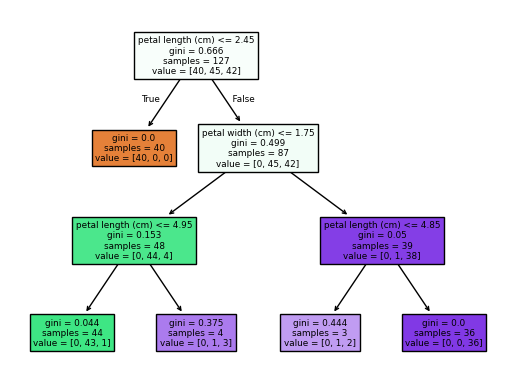

In [26]:
from sklearn import tree
tree.plot_tree(c,feature_names=iris.feature_names,filled=True)
plt.show()

In [27]:
from sklearn.svm import SVC

In [28]:
mymodel(SVC())

Training score : 0.9763779527559056
Testing score : 0.9565217391304348
Confusion Matrix : 
            setosa  versicolor  virginica
setosa          10           0          0
versicolor       0           4          1
virginica        0           0          8
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.80      0.89         5
           2       0.89      1.00      0.94         8

    accuracy                           0.96        23
   macro avg       0.96      0.93      0.94        23
weighted avg       0.96      0.96      0.96        23



SVC()

In [29]:
parameters={
    "C":[0.01,0.1,1.0,10],
    "gamma":[0.01,0.1,1.0,10],
    "kernel":['rbf','poly']
}

In [30]:
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(SVC(),parameters,verbose=2)
clf.fit(xtrain,ytrain)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .....................C=0.01, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.01, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.01, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.01, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.01, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ....................C=0.01, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ....................C=0.01, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ....................C=0.01, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ....................C=0.01, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.01, gamma=0.

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1.0, 10],
                         'gamma': [0.01, 0.1, 1.0, 10],
                         'kernel': ['rbf', 'poly']},
             verbose=2)

In [31]:
clf.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [32]:
clf.best_estimator_

SVC(C=10, gamma=0.1)

In [33]:
svc=mymodel(clf.best_estimator_)

Training score : 0.984251968503937
Testing score : 0.9565217391304348
Confusion Matrix : 
            setosa  versicolor  virginica
setosa          10           0          0
versicolor       0           4          1
virginica        0           0          8
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.80      0.89         5
           2       0.89      1.00      0.94         8

    accuracy                           0.96        23
   macro avg       0.96      0.93      0.94        23
weighted avg       0.96      0.96      0.96        23



In [34]:
svc.support_vectors_

array([[4.5, 2.3, 1.3, 0.3],
       [5.7, 4.4, 1.5, 0.4],
       [5.1, 3.3, 1.7, 0.5],
       [5.1, 3.8, 1.9, 0.4],
       [5.4, 3. , 4.5, 1.5],
       [5.5, 2.6, 4.4, 1.2],
       [6.7, 3. , 5. , 1.7],
       [6.3, 2.5, 4.9, 1.5],
       [5.5, 2.3, 4. , 1.3],
       [5.9, 3.2, 4.8, 1.8],
       [5.1, 2.5, 3. , 1.1],
       [5.6, 3. , 4.5, 1.5],
       [6.3, 3.3, 4.7, 1.6],
       [6.9, 3.1, 4.9, 1.5],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.2, 5. , 1.5],
       [6.5, 3.2, 5.1, 2. ],
       [4.9, 2.5, 4.5, 1.7],
       [6.1, 3. , 4.9, 1.8],
       [5.9, 3. , 5.1, 1.8],
       [6. , 3. , 4.8, 1.8],
       [7.9, 3.8, 6.4, 2. ],
       [6.2, 2.8, 4.8, 1.8],
       [7.2, 3. , 5.8, 1.6]])

In [35]:
svc.n_support_

array([ 4, 10, 10], dtype=int32)

In [36]:
svc

SVC(C=10, gamma=0.1)

In [37]:
import pickle
with open("model.pkl","wb") as f:
    pickle.dump(svc,f)